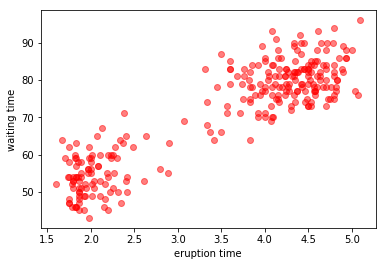

In [142]:
data=[[], []]
f=open('faithful.dat')
for line in f:
    line=line.split()
    if not line or not line[0].isdigit(): continue
    data[0].append(float(line[1]))
    data[1].append(int(line[2]))
data=np.array(data)
import matplotlib.pyplot as plt
plt.plot(data[0], data[1], 'ro', alpha=0.5)
plt.xlabel('eruption time')
plt.ylabel('waiting time')
plt.show()

In [158]:
import random
def random_start(data):
    mu=np.array([data.T[i] for i in random.sample(range(len(data[0])),2)])
#     sigma=np.array([[[1,0],[0,1]],[[1,0],[0,1]]])
    sigma = []
    for k in range(2): sigma.append(np.cov(data.T[:20+int(random.random()*(len(data.T)-20))].T))
    print(sigma[0].shape)
    pi=0.5
    return mu,sigma,pi

In [160]:
import numpy as np
# def gaussian(x, mu, sigma):
#     dimension = len(x)
#     cov_det = np.linalg.det(sigma)
#     central_x = np.matrix(x - mu)
#     cov_inverse = np.linalg.inv(sigma)
#     left = 1 / np.sqrt(((2 * np.pi) ** dimension) * cov_det)
#     right = -1 / 2 * central_x * cov_inverse * central_x.T
#     ret = left * np.exp(right)
#     return float(ret)
def gaussian(x, mu, sigma):
    dim = len(x)
    norm_factor = (2*np.pi)**dim

    norm_factor *= np.linalg.det(sigma)
    norm_factor = 1.0/np.sqrt(norm_factor)

    x_mu = np.matrix(x-mu)

    rs = norm_factor*np.exp(-0.5*x_mu*np.linalg.inv(sigma)*x_mu.T)
    return rs

def e_step(data, mu, sigma, pi):    
    gamma=[]
    for i in range(len(data[0])):
        likelihood = (((1-pi)*gaussian([data[0][i],data[1][i]], mu[0], sigma[0])) + (pi*gaussian([data[0][i],data[1][i]], mu[1], sigma[1]))) 
        gamma.append(pi*gaussian(data.T[i], mu[1], sigma[1])/likelihood)
    return gamma

def m_step(data, gamma):
    gamma=[float(matrix) for matrix in gamma]
    sample_size = data.shape[1]    
    mu = np.zeros((2, 2))
    sigma = np.zeros((2, 2, 2))
    sumGamma=0
    for i in range(2):
        for n in range(sample_size):
            sumGamma += gamma[n]
            mu[i] += float(1-gamma[n])*data.T[n]
        mu[i] /= (sample_size - sumGamma)

        for n in range(sample_size):
            x_mu = np.zeros((1,2))+data.T[n]-mu[i]
            sigma[i] += ((1-gamma[n]))*x_mu*x_mu.T
        sigma[i] /= (sample_size - sumGamma)
        pi = sumGamma/sample_size        
        
    return mu, sigma, pi

In [165]:
mu,sigma,pi = random_start(data)

# Run it 50 times to see the mu trajectory
mu_trajectory = []
iteration = []
mu_trajectory.append(mu)
for i in range(50):
    gamma = e_step(data,mu,sigma,pi)
    mu,sigma,pi = m_step(data,gamma)
    iteration.append(i)
    mu_trajectory.append(mu)

(2, 2)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1804: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


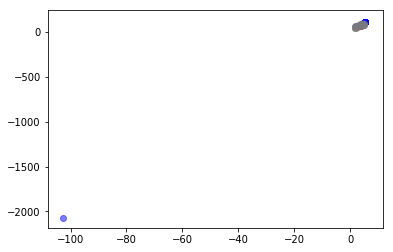

In [163]:
mu_trajectory = np.array(mu_trajectory)


plt.scatter(mu_trajectory[:,0,0],mu_trajectory[:,0,1], alpha=0.5, color='red')
plt.scatter(mu_trajectory[:,1,0],mu_trajectory[:,1,1], alpha=0.5, color='blue')
plt.scatter(data.T[:,0], data.T[:,1], alpha=0.1,color='grey')
plt.show()

